# Assignment 01 ( Matrix Factorization )

---


CSE 4238

---


ID : 170104037

---


Sec : A

---


Date : 24/07/2021


# **Libraries**

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import spatial
import seaborn as sns

# **Finding Index Id**

In [4]:
index_id = 0 
with open("index_id.csv") as f:
    index = csv.reader(f)
    for row in index:
        if(row[0]=='170104037'):
            index_id = row[2]
index_id

'279'

# **Dataset**

In [ ]:
#load main data
main_data = pd.read_csv('Matrix_Factorization_Assignment.csv')

**Dataset creation**
*   Copy main data from 'main_data' to 'data'
*   Total 45000 rows and 5001 columns in the given dataset

In [ ]:
data = main_data.copy()
print(data.shape)
data.head()

(45000, 5001)


,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


**Removing rows and columns**

*   index_id = 279
*   Updated number of rows = 45000 - 161 = 44839
*   Updated number of columns = 5001 - (18+1) = 4983
*   Saved updated dataset as 'Dataset.csv'

In [ ]:
#delete rows
for key,row in data.iterrows():
    if(row['Index'] % int(index_id) == 0):
        data.drop(key,axis=0,inplace=True)

#delete columns
data=data.drop(['Index'],axis=1)
data.head()
for key,column in data.iteritems():
    if(int(key) != 0 and int(key) % int(index_id) == 0):
        data.drop(key,axis=1,inplace=True)
    
#save updated dataset
data.to_csv('Dataset.csv',index=False)
print(main_data.shape)
print(data.shape) #total 161 rows and 18+1 column droped

(45000, 5001)
(44839, 4983)


In [5]:
data = pd.read_csv('Dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,9.0,...,1.0,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,8.0,...,9.0,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,4.0,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,...,10.0,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,2.0,...,NaN,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


*   Replacing all the NaN values with zero
*   Transforming the data into numpy array
*   Storing the value of N and M from main data

In [6]:
main_data = np.array(data.replace(np.nan,0),dtype=np.float32)
print(main_data)

N = len(main_data)
M = len(main_data[0])
print(N,M)

[[ 1.  7.  1. ...  0.  0.  0.]
 [ 0.  3.  3. ...  0.  9.  2.]
 [ 5.  7.  0. ...  0.  0.  7.]
 ...
 [ 0.  9.  0. ...  0.  1.  4.]
 [10.  0.  7. ...  0.  8.  8.]
 [ 0.  7.  0. ...  0.  2.  0.]]
44839 4983


# Matrix Factorization
*   Function for generating random matrix V with dimension M*K
*   Function to calculate U with dimension N*K
*   Function to calculate updated V
*   Function to calculate mean squared error



In [7]:
def generate_and_normalize_V(K):
    V = np.random.randint(1,10,size=(M,K))
    return normalize(V, axis=1, norm='l2')

def calculate_U(V,lambda_U,K,main_data):
    temp1 = main_data.dot(V)   # N X M * M X K
    temp2 = (V.T).dot(V) + (lambda_U*np.eye(K))    # K X M * M X K  + cons * K X K................
    U = temp1.dot(np.linalg.inv(temp2)) # N X K * K X K..............
    return U  # N X K

def calculate_V(U,lambda_V,K,main_data):
    temp1 = (main_data.T).dot(U)   #M X N * N X K
    temp2 = (U.T).dot(U) + (lambda_V*np.eye(K))   # K X N * N X K  + cons * K X K  
    V = temp1.dot(np.linalg.inv(temp2))  # M X K * K X K
    return V  # M X K

def MSE(y_true, y_pred):
    mask = np.nonzero(y_true)
    return mean_squared_error(y_true[mask], y_pred[mask])

# Implementation and  Hyperparameter Tuning
*   Initialization of  V matrix randomly and normalized with 'l2' normalizer
*   λv and λu were calculated according to the given instructions
*   Here K = 100,200,300,.....,1000 
*   For each K there's 800 iterations
*   For each K result was plotted
*   All the values of K was plotted at last for better understanding


# **For K = 100 to 900 and Iteration = 100**





Running for K = 100


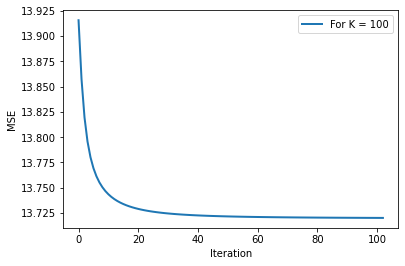

Running for K = 200


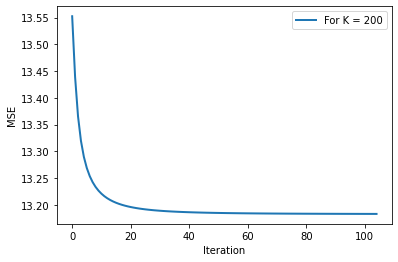

Running for K = 300


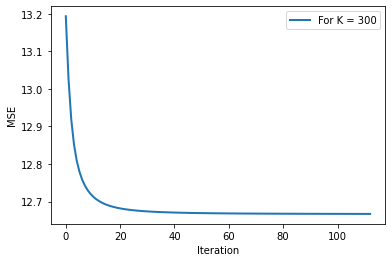

Running for K = 400


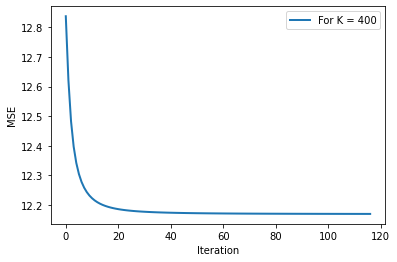

Running for K = 500


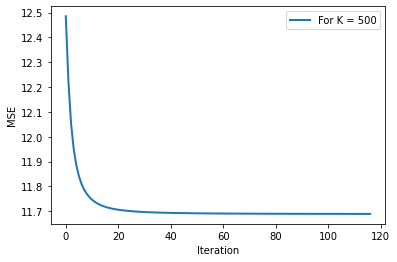

Running for K = 600


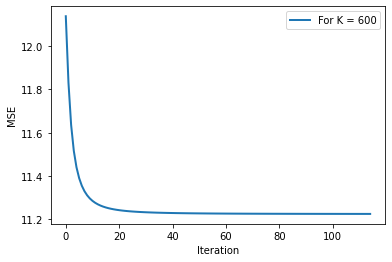

Running for K = 700


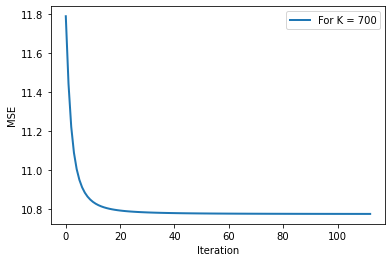

Running for K = 800


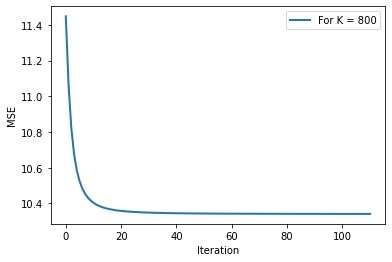

Running for K = 900


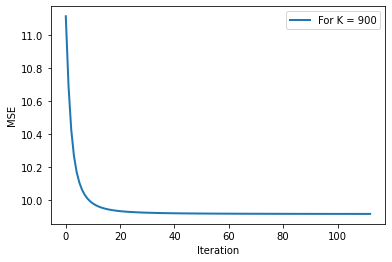

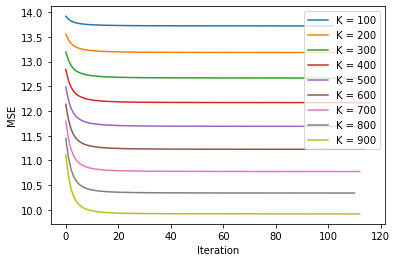

In [ ]:
values = []
start = 100
end = 905
interval = 100
for k in range(start,end,interval):
    L = []
    V = generate_and_normalize_V(k)
    #print(V)
    lambda_V = (0.00025 - 0.0001 * (int(index_id) % 7))
    lambda_U = (0.00015 + 0.0001 * (int(index_id) % 8))
    #print(lambda_V,lambda_U)
    # i=0
    print('Running for K = ' + str(k))
    for _ in range(800):
        # i=i+1
        # print(i)
        U = calculate_U(V,lambda_U,k,main_data)
        V = calculate_V(U,lambda_V,k,main_data)
        #print(V,U)
        mse = MSE(main_data,U.dot(V.T))
        # print(mse)
        if (len(L) > 1 and L[-1]-mse < 0.00001):
            break
        # if (len(L)>1):
        #   print(L[-1]-mse)
        L.append (mse)


    plt.plot(L, label = 'For K = ' + str(k), linewidth = 2)
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend(loc = 'upper right')
    plt.show()
    values.append(L)

i=start
for j,value in enumerate(values):
    plt.plot(value, label = 'K = ' + str(i))
    i=i+interval
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

#For K = 100 and 1000, Iteration = 110

*   For K = 100 , L = 13.725, Computation time = 28 minutes
*   For K = 1000 , L reduced into 9.6, Computation time = 2 hour 30 minutes

Running for K = 100
10
20
30
40
50
60
70
80
90
100


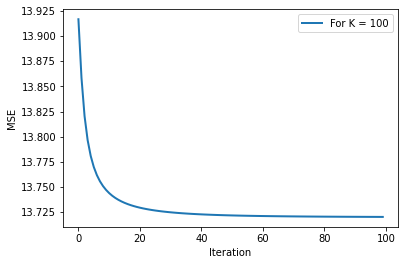

Running for K = 1000
10
20
30
40
50
60
70
80
90
100
110


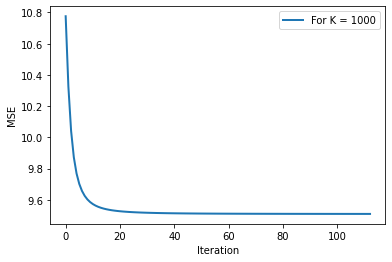

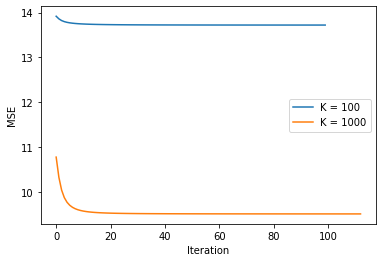

In [ ]:
values = []
start = 100
end = 1005
interval = 900
for k in range(start,end,interval):
    L = []
    V = generate_and_normalize_V(k)
    #print(V)
    lambda_V = (0.00025 - 0.0001 * (int(index_id) % 7))
    lambda_U = (0.00015 + 0.0001 * (int(index_id) % 8))
    #print(lambda_V,lambda_U)
    i=0
    print('Running for K = ' + str(k))
    for _ in range(800):
        i=i+1
        if(i%10==0):
          print(i)
        U = calculate_U(V,lambda_U,k,main_data)
        V = calculate_V(U,lambda_V,k,main_data)
        #print(V,U)
        mse = MSE(main_data,U.dot(V.T))
        # print(mse)
        if (len(L) > 1 and L[-1]-mse < 0.00001):
            break
        # if (len(L)>1):
        #   print(L[-1]-mse)
        L.append (mse)


    plt.plot(L, label = 'For K = ' + str(k), linewidth = 2)
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend(loc = 'upper right')
    plt.show()
    values.append(L)

i=start
for j,value in enumerate(values):
    plt.plot(value, label = 'K = ' + str(i))
    i=i+interval
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

# For K = 1000 and iteration = 20

*   Computation time = 20 minutes
*   Loss = 9.6



Running for K = 1000
5
10
15
20


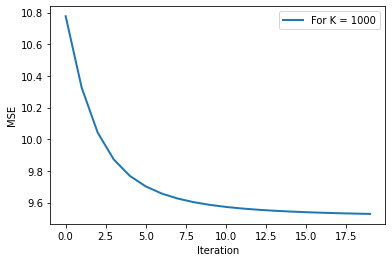

In [7]:
values = []
start = 1000
end = 1005
interval = 900
for k in range(start,end,interval):
    L = []
    V = generate_and_normalize_V(k)
    #print(V)
    lambda_V = (0.00025 - 0.0001 * (int(index_id) % 7))
    lambda_U = (0.00015 + 0.0001 * (int(index_id) % 8))
    #print(lambda_V,lambda_U)
    i=0
    print('Running for K = ' + str(k))
    for _ in range(20):
        i=i+1
        if(i%5==0):
          print(i)
        U = calculate_U(V,lambda_U,k,main_data)
        V = calculate_V(U,lambda_V,k,main_data)
        mse = MSE(main_data,U.dot(V.T))
        L.append (mse)


    plt.plot(L, label = 'For K = ' + str(k), linewidth = 2)
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend(loc = 'upper right')
    plt.show()
    values.append(L)

# For K = 4000 and iteration = 20


*   Computation time = 1 hour 20 minutes
*   Loss = 1.4



Running for K = 4000
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


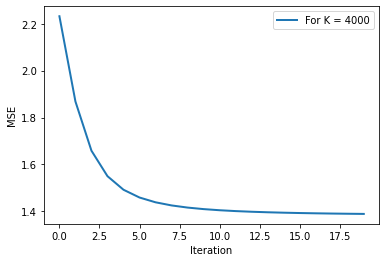

In [8]:
values = []
start = 4000
end = 4005
interval = 900
for k in range(start,end,interval):
    L = []
    V = generate_and_normalize_V(k)
    #print(V)
    lambda_V = (0.00025 - 0.0001 * (int(index_id) % 7))
    lambda_U = (0.00015 + 0.0001 * (int(index_id) % 8))
    #print(lambda_V,lambda_U)
    i=0
    print('Running for K = ' + str(k))
    for _ in range(20):
        i=i+1
        print(i)
        U = calculate_U(V,lambda_U,k,main_data)
        V = calculate_V(U,lambda_V,k,main_data)
        mse = MSE(main_data,U.dot(V.T))
        L.append (mse)


    plt.plot(L, label = 'For K = ' + str(k), linewidth = 2)
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend(loc = 'upper right')
    plt.show()
    values.append(L)

#Saving U,V,X and Loss for further use

In [10]:
pd.DataFrame(U).to_csv("U.csv", header=None, index=None)
pd.DataFrame(V).to_csv("V.csv", header=None, index=None)
pd.DataFrame(U.dot(V.T)).to_csv("X.csv", header=None, index=None)
pd.DataFrame(values).to_csv("values.csv", header=None, index=None)

In [12]:
U = pd.read_csv('U.csv')
U = np.array(U,dtype=np.float32)

V = pd.read_csv('V.csv')
V = np.array(V,dtype=np.float32)

# Functions to calculate Cosine Simlarity pairwise
*   For Ram issue cosine similarity was calculated for first 4500 data
*   Total N*(N-1) pairs for U and V
*   Calculated cosine similarity = (1-cosine distance)

In [13]:
def make_pair(P):
    #K = len(P)
    K=4500
    pairs = []
    j=0
    # create a list of tuples
    for i in range (K):
        for j in range (K):
            if j>i:
                pairs.append((P[i],P[j]))
    return pairs
        
def compute_cosine_similarity(pair):
    # extract the indexes from the pair
    id_1, id_2 = pair
    
    cosine_similarity = 1 - spatial.distance.cosine(id_1, id_2)

    return cosine_similarity

## Finding Cosine Similarity for V


*   Larger value of similarity indicates more similarity and less disctance of a pair



In [14]:
pairs = make_pair(V)

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]  
# create a dataframe
df = pd.DataFrame({'pair': pairs,'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

df.drop('pair', axis=1, inplace=True)
pd.DataFrame(df).to_csv("cosine_similarity_V.csv", header=None, index=None)

,pair,similarity
0,"([0.045074146, 0.039826065, 0.004812716, 0.026...",0.719928
1,"([0.045074146, 0.039826065, 0.004812716, 0.026...",0.704116
2,"([0.045074146, 0.039826065, 0.004812716, 0.026...",0.706271
3,"([0.045074146, 0.039826065, 0.004812716, 0.026...",0.728366
4,"([0.045074146, 0.039826065, 0.004812716, 0.026...",0.708168


,pair,similarity
10122745,"([-0.0034558326, 0.021391653, 0.0267021, 0.011...",0.723414
10122746,"([-0.0034558326, 0.021391653, 0.0267021, 0.011...",0.700795
10122747,"([0.012811938, 0.027002161, 0.03344594, 0.0552...",0.727188
10122748,"([0.012811938, 0.027002161, 0.03344594, 0.0552...",0.714991
10122749,"([0.07942145, 0.0052551418, 0.03735216, 0.0105...",0.706201


## Heatmap generation for V
*   Darker colour indicates more similarity between a pair
*   Lighter colour indicates less similarity between a pair

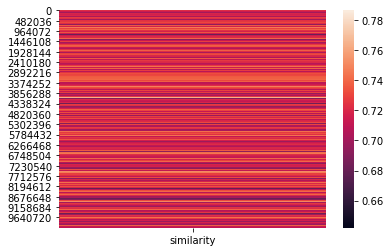

In [15]:
df = pd.DataFrame(df)
p1 = sns.heatmap(df)

## Finding Cosine Similarity for U


*   Larger value of similarity indicates more similarity and less disctance of a pair



In [16]:
pairs = make_pair(U)

pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]    #for 4500 users
# create a dataframe
df = pd.DataFrame({'pair': pairs,'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

df.drop('pair', axis=1, inplace=True)
pd.DataFrame(df).to_csv("cosine_similarity_U.csv", header=None, index=None)

,pair,similarity
0,"([0.50852215, -8.244865, -2.1389105, -12.59222...",-0.036034
1,"([0.50852215, -8.244865, -2.1389105, -12.59222...",-0.024205
2,"([0.50852215, -8.244865, -2.1389105, -12.59222...",0.036196
3,"([0.50852215, -8.244865, -2.1389105, -12.59222...",0.035086
4,"([0.50852215, -8.244865, -2.1389105, -12.59222...",0.007697


,pair,similarity
10122745,"([1.9837978, 8.961695, -0.15829039, -3.4256666...",-0.015252
10122746,"([1.9837978, 8.961695, -0.15829039, -3.4256666...",-0.039389
10122747,"([4.7360296, -8.561624, 0.9574435, -2.6274548,...",-0.001276
10122748,"([4.7360296, -8.561624, 0.9574435, -2.6274548,...",0.031909
10122749,"([-3.7575936, -6.393804, 2.8837128, -1.4495814...",-0.014330


## Heatmap generation for U
*   Darker colour indicates more similarity between a pair
*   Lighter colour indicates less similarity between a pair

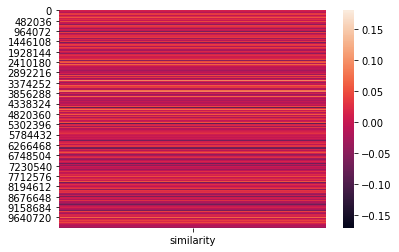

In [17]:
df = pd.DataFrame(df)
p1 = sns.heatmap(df)

# Suggestion of five movies(v) that user u did not review yet

In [2]:
X = pd.read_csv('X.csv')
X = np.array(X,dtype=np.float32)

data = pd.read_csv('Dataset.csv')
main_data = np.array(data,dtype=np.float32)

# Function for movie suggestion
*   Stored all the indexes no with null values
*   Colleted all the ratings from predicted dataset of these null values
*   Sorted and sliced first five


In [3]:
def movie_suggestion(user_id=100,no_of_suggested_movies=5):
    suggested_movies=[]
    movies = main_data[user_id]
    #print(movies)
    zero_rating =  np.where(np.isnan(movies))[0]
    #print(len(zero_rating))
    #print(zero_rating)
    if len(zero_rating) > no_of_suggested_movies:
        for i in zero_rating:
            suggested_movies.append (np.clip(X[user_id][i],0.0,10.0))
        df = pd.DataFrame({'movie_id': zero_rating,'Ratings': suggested_movies})
        df = df.sort_values(by=['Ratings'], ascending=False,ignore_index=True)
        df = df[0:5]
        print(df)
        return df
    else:
        return 0

## Suggestion of movies for first 1000 user

In [6]:
# N = len(main_data)
N = 1000
movie_suggestion_list=[]
for i in range(N):
    print('For User ',i+1)
    suggested_movies = movie_suggestion(i,5)

Streaming output truncated to the last 5000 lines.
3       357   8.971927
4      2627   8.749078
For User  287
   movie_id   Ratings
0      4192  8.737727
1      2871  8.647321
2       689  8.003632
3      1262  7.975063
4      2744  7.972741
For User  288
   movie_id   Ratings
0      4935  9.824265
1       977  9.346282
2      3508  8.695723
3      3376  8.460757
4      3992  8.218367
For User  289
   movie_id   Ratings
0      2894  9.354388
1      1013  8.819145
2       131  8.620949
3      3987  8.569636
4      3774  8.304077
For User  290
   movie_id   Ratings
0      2422  9.633567
1      4243  9.475004
2      2737  8.761863
3      1375  8.625076
4      2616  8.205235
For User  291
   movie_id   Ratings
0      1225  9.341352
1       357  9.277451
2        75  9.126455
3      2030  9.118627
4      1922  9.067487
For User  292
   movie_id   Ratings
0      4963  9.252549
1      3059  8.708685
2       363  8.420249
3      1271  8.167438
4       329  8.063313
For User  293
   movie_id  